# <center> <img src="../../labs/img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
### <center> **Big Data** </center>
---
### <center> **Spring 2025** </center>
---
**Mid-term exam**

**Date**: 3/12/2025

**Student Name**: Miguel Alberto Torres Dueñas

**Professor**: Pablo Camarillo Ramirez

In [46]:
import findspark
findspark.init()

In [47]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SparkSQL-Exam-1-Miguel") \
    .master("spark://f5db43ce3d38:7077") \
    .config("spark.ui.port","4040") \
    .getOrCreate()
sc = spark.sparkContext

In [48]:
from grandeInformacion.spark_utils import SparkUtils
products_schema = SparkUtils.generate_schema([("product_id", "string"), ("product_name", "string"), ("category", "string"), ("price", "float")])

products_df = spark.read \
                .schema(products_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/exam_P2025_ESI3914N/products.csv")


products_df.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- price: float (nullable = true)



In [49]:
sales_schema = SparkUtils.generate_schema([("transaction_id", "string"), ("product_id", "string"), ("customer_id", "string"), ("sale_amount", "float"), ("sale_date", "date")])
sales_df = spark.read \
                .schema(sales_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/exam_P2025_ESI3914N/sales.csv")

sales_df.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- sale_amount: float (nullable = true)
 |-- sale_date: date (nullable = true)



In [50]:
join_df = sales_df.join(products_df, 
      sales_df["product_id"] == products_df["product_id"], 
      "inner")

In [51]:
from pyspark.sql.functions import sum
grouped_df = join_df.groupBy("category").agg(sum("sale_amount").alias("total_sales_amount")).orderBy("total_sales_amount", ascending=False)


In [52]:
from pyspark.sql.functions import when, col

join_df = join_df.withColumn("sale_type", when(col("sale_amount") >= 50, "High").otherwise("Low"))


In [53]:
filtered_df = join_df.where(col("category") == "Electronics")


In [54]:
selected_df = filtered_df.select("product_name", "sale_amount", "sale_type")

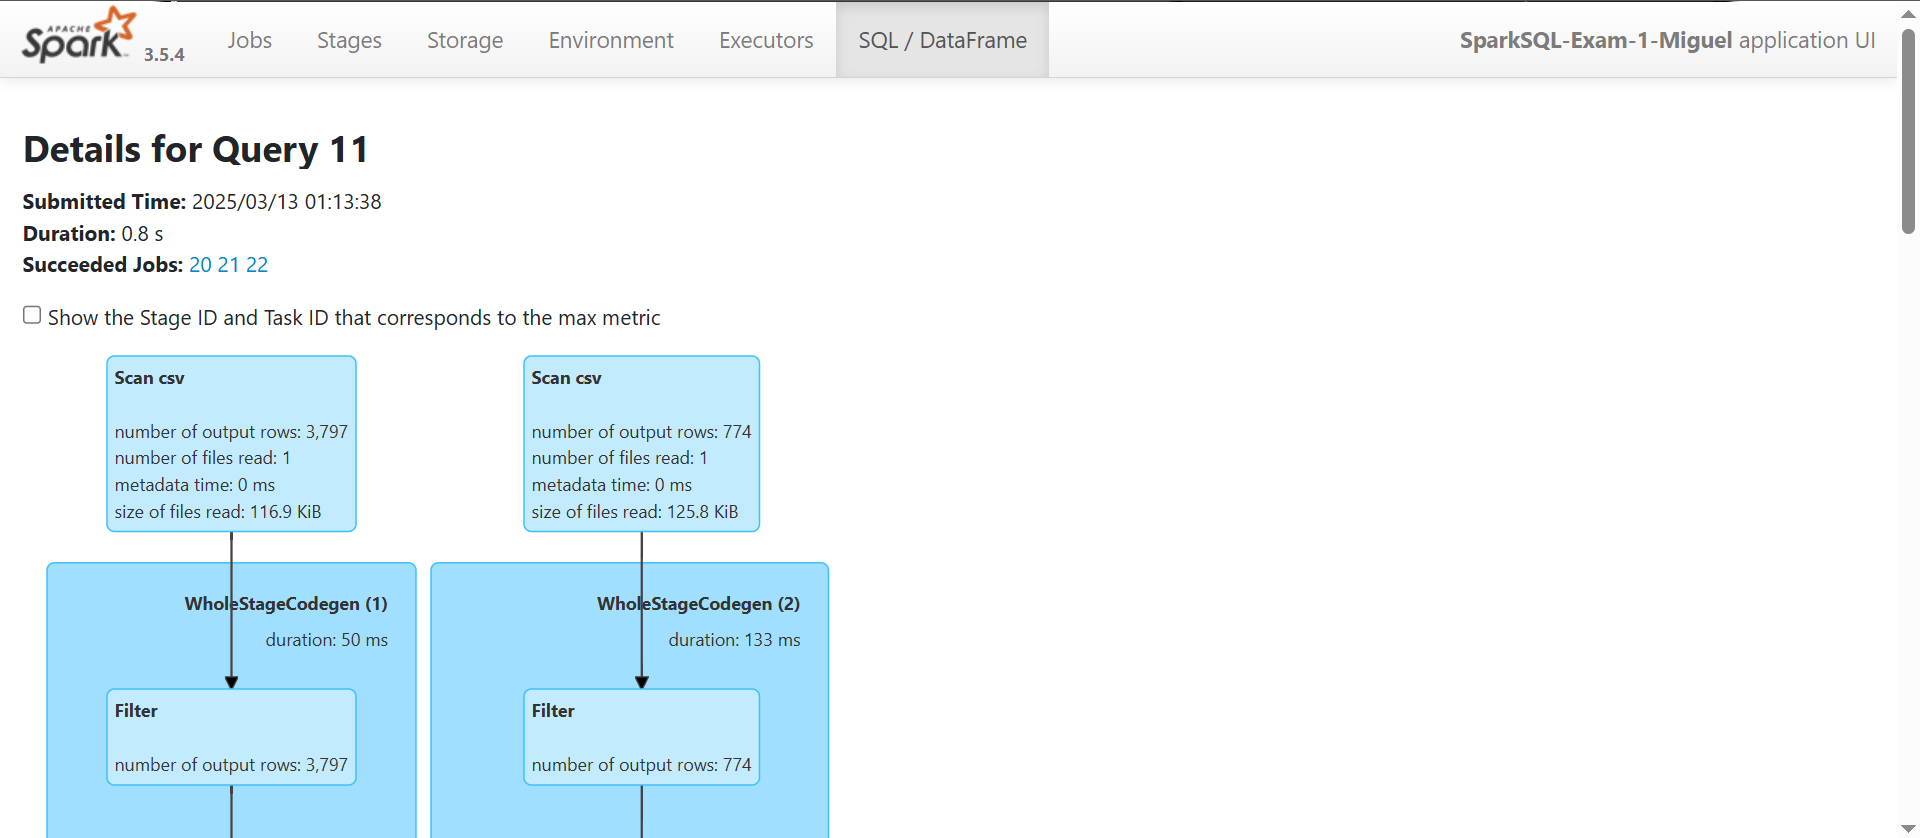

In [55]:
selected_df.show(5)
selected_df.count()

+------------+-----------+---------+
|product_name|sale_amount|sale_type|
+------------+-----------+---------+
| Product 100|      55.14|     High|
| Product 100|     694.06|     High|
| Product 100|      64.41|     High|
| Product 100|     472.98|     High|
| Product 100|     228.41|     High|
+------------+-----------+---------+
only showing top 5 rows



612

In [56]:
# Stop the SparkContext
sc.stop()